In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
print(f"Loading dataset from: {url}")
df = pd.read_csv(url)

Loading dataset from: https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Separate features (X) and target (y - assuming last column)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use transform only on test set

In [ ]:
# 2. Build the Regularized FNN Model
model = keras.Sequential([
    # Example for L1 REGULARIZATION
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1(0.01),
                 input_shape=(X_train.shape[1],)), 

    # Example for DROPOUT
    layers.Dropout(0.3),

    # Example for L2 REGULARIZATION
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
                 
    layers.Dropout(0.3),
    layers.Dense(1)
])


In [25]:
# 3. Compile the Model
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])   

In [33]:
# 4. Train the Model
# Use EarlyStopping callback to prevent overfitting and save time 
# Example for EARLY STOPPING
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                              patience=10,         # Stop after 10 epochs with no improvement
                               restore_best_weights=True) # Keep the best model weights


# Verbose: Set to 0 for silent training, 1 for progress bar
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,          
                    batch_size=16,       
                    callbacks=[early_stopping])

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1502 - mae: 0.3033 - val_loss: 0.1764 - val_mae: 0.3284
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1461 - mae: 0.2956 - val_loss: 0.1760 - val_mae: 0.3280
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1591 - mae: 0.3131 - val_loss: 0.1755 - val_mae: 0.3275
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1583 - mae: 0.3127 - val_loss: 0.1769 - val_mae: 0.3325
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1552 - mae: 0.3141 - val_loss: 0.1758 - val_mae: 0.3276
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1579 - mae: 0.3115 - val_loss: 0.1755 - val_mae: 0.3272
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1613 - mae: 0.3165 - val_loss: 0.1760 - val_mae: 0.3265
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1470 - mae: 0.2973 - val_loss: 0.1745 - val_mae: 0.3255
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.162

In [31]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Calculate performance metrics 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mae, mse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(0.3259289264678955, 0.16629697382450104)

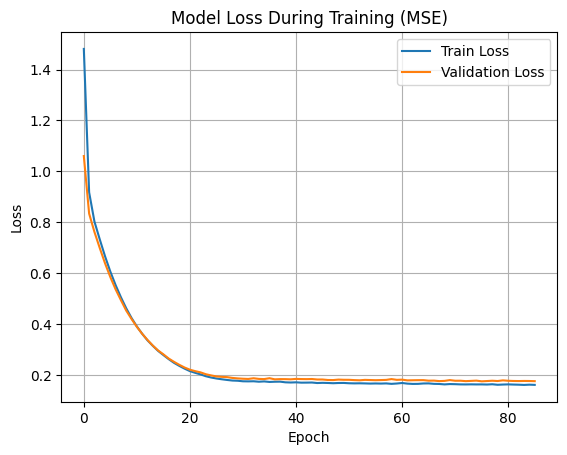

In [28]:
# 6. Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training (MSE)')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid(True)
plt.show()